In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

fm.fontManager.addfont('/usr/share/fonts/truetype/MyriadPro/MYRIADPRO-REGULAR.OTF')
plt.rcParams.update({'font.size': 45, 'font.family': 'Myriad Pro'})
plt.rcParams['hatch.linewidth'] = 2

In [3]:
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

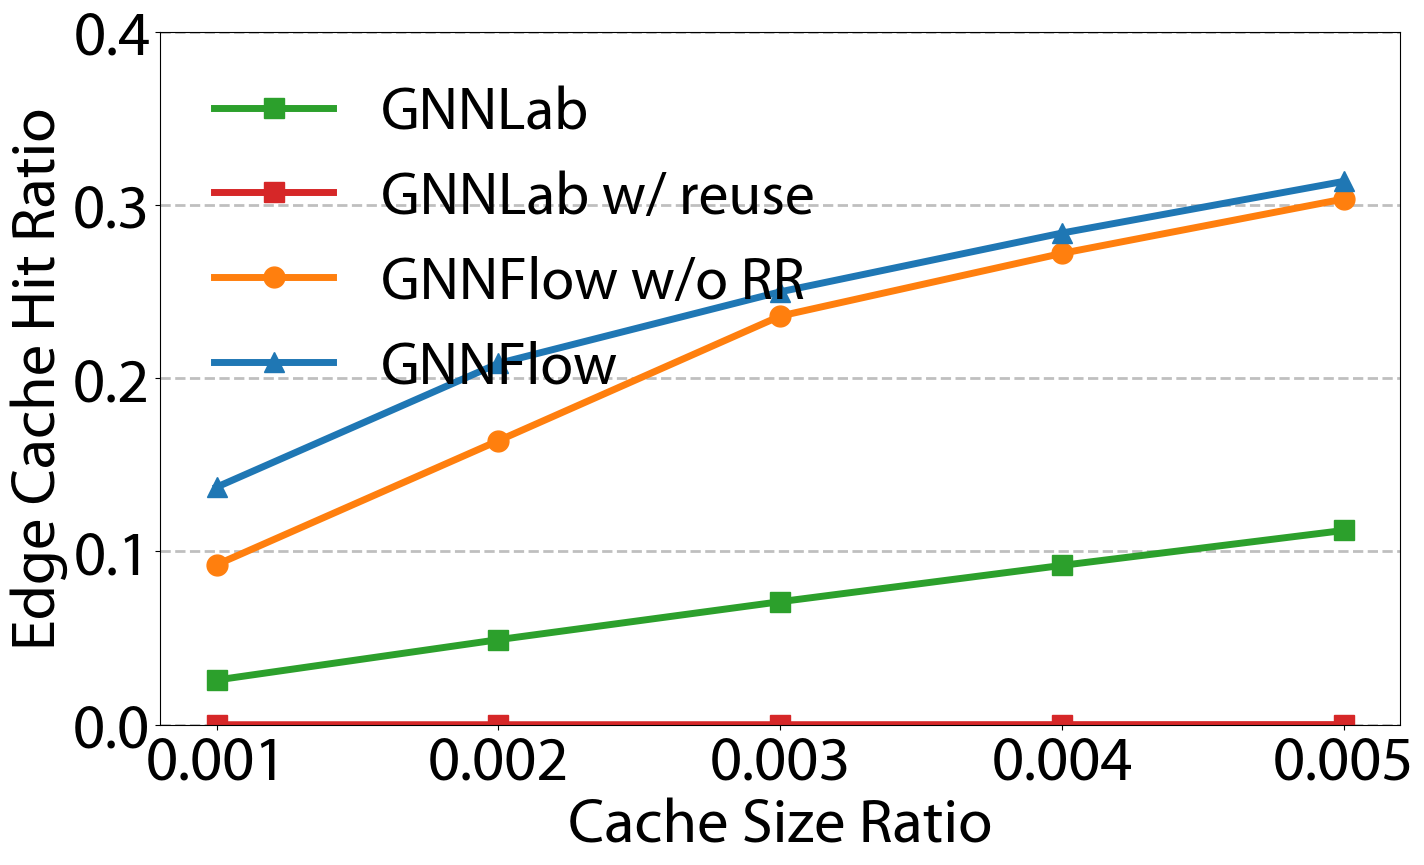

In [8]:
model = 'TGN'
dataset = 'NETFLIX'
cache_ratio_list = [0.001, 0.002, 0.003, 0.004, 0.005]


lru_wo_rr_edge_cache_ratio  = [0.09233172000809149,
0.1639503911137581,
0.2358784248883074,
0.2720650502226569,
0.30347351323474536]
lru_edge_cache_ratio = [0.13711905682628805,
0.20854130725968967,
0.24987094510685315,
0.2838034413077615,
0.31363263726234436] 
gnnlab_edge_cache_ratio = [0.025795299898494373,
0.049089553342624145,
0.07101463932882655,
0.09196055511182005,
0.11215021630579775]
gnnlab_w_reuse_edge_cache_ratio = [1.099316767233011e-06,
4.439237603616096e-06,
1.600294268655489e-05,
5.0723626372928265e-05,
7.773408349914297e-05]


fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(cache_ratio_list, gnnlab_edge_cache_ratio, '-', color='tab:green', marker='s', label='GNNLab', lw=5, markersize=15)
ax.plot(cache_ratio_list, gnnlab_w_reuse_edge_cache_ratio, '-', color='tab:red', marker='s', label='GNNLab w/ reuse', lw=5, markersize=15)
ax.plot(cache_ratio_list, lru_wo_rr_edge_cache_ratio, '-', color='tab:orange', marker='o', label='GNNFlow w/o RR', lw=5, markersize=15)
ax.plot(cache_ratio_list, lru_edge_cache_ratio, '-', color='tab:blue', marker='^', label='GNNFlow', lw=5, markersize=15)
ax.set_ylabel('Edge Cache Hit Ratio')
ax.set_xlabel('Cache Size Ratio')
ax.set_xticks(cache_ratio_list)
# ax.set_ylim(0.0, 1.02)
ax.yaxis.grid(True, linestyle='--', linewidth=2, color='grey', alpha=0.5)

# ax2 = ax.twinx()
# ax2.plot(cache_ratio_list, gnnlab_edge_cache_ratio, '--', color='tab:green', marker='s', label='GNNLab', lw=5, markersize=15)
# ax2.plot(cache_ratio_list, lru_wo_rr_edge_cache_ratio, '--', color='tab:orange', marker='o', label='GNNFlow w/o RR', lw=5, markersize=15)
# ax2.plot(cache_ratio_list, lru_edge_cache_ratio, '--', color='tab:blue', marker='^', label='GNNFlow', lw=5, markersize=15)
# ax2.set_ylabel('Edge Cache Hit Ratio')
# ax2.set_ylim(0.2, 1.05)
# plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# 
ax.legend(loc='upper left', fontsize=34, framealpha=0) 
# ax2.legend(fontsize=34, framealpha=0)
# ax2.set_yticks(np.arange(0.855, 0.881, 0.005))
plt.savefig('cache_edge_diff_size.svg', dpi=400, bbox_inches='tight')